👨‍💻K-Means Model + Knn Model

This project combines two powerful machine learning techniques, K-Means and K-Nearest Neighbors (KNN), to address a classification or data analysis problem. The K-Means Model is used to cluster data into groups, aiding in the discovery of patterns and structures within the data. Subsequently, the KNN model is employed to classify samples based on their proximity to the centroids of clusters identified by K-Means. Together, these two approaches can be used to solve a variety of classification and data segmentation problems. This notebook provides a practical approach to implementing and evaluating these models, offering a deeper understanding of how they can be applied to real-world problems.

📝 Instructions

🏬House grouping system
We want to be able to classify houses according to their region and median income. To do this, we will use the famous California Housing dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.

Step 1: Loading the dataset🎲
The dataset can be found in this project folder under the name housing.csv. You can load it into the code directly from the link (https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv) or download it and add it by hand in your repository. In this case we are only interested in the Latitude, Longitude and MedInc columns.

Be sure to conveniently split the dataset into train and test as we have seen in previous lessons. Although these sets are not used to obtain statistics, you can use them to train the unsupervised algorithm and then to make predictions about new points to predict the cluster they are associated with.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
total_data = pd.read_csv(url)

print(total_data.head())

total_data.to_csv("/workspace/Unsupervised-Learning-K-means/data/raw/housing.csv", index=False)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [2]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


💾Split data train & test data

In [3]:
from sklearn.model_selection import train_test_split

# Columns selected
relevant_data = total_data[['Latitude', 'Longitude', 'MedInc']]
X = relevant_data  # Features

# Split data into train and test
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [4]:
X_train.to_csv("/workspace/Unsupervised-Learning-K-means/data/processed/X_train.csv")
X_test.to_csv("/workspace/Unsupervised-Learning-K-means/data/processed/X_test.csv")

👨‍💻Step.2 KMeans

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, random_state=42)
model.fit(X_train)

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

In [6]:
X_train['cluster'] = model.labels_ # = y

In [7]:
X_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,2
8267,33.77,-118.16,3.8125,2
17445,34.66,-120.48,4.1563,0
14265,32.69,-117.11,1.9425,2
2271,36.78,-119.80,3.5542,0


In [8]:
from pickle import dump
dump (model, open (f"/workspace/Unsupervised-Learning-K-means/models/k-means_model_clusters6_rs42.pk", "wb"))

In [9]:
X_test['cluster'] = model.predict(X_test)

In [10]:
X_test.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,0
3024,35.14,-119.46,2.5313,0
15663,37.80,-122.44,3.4801,4
20484,34.28,-118.72,5.7376,3
9814,36.62,-121.93,3.7250,4


📊Plot data

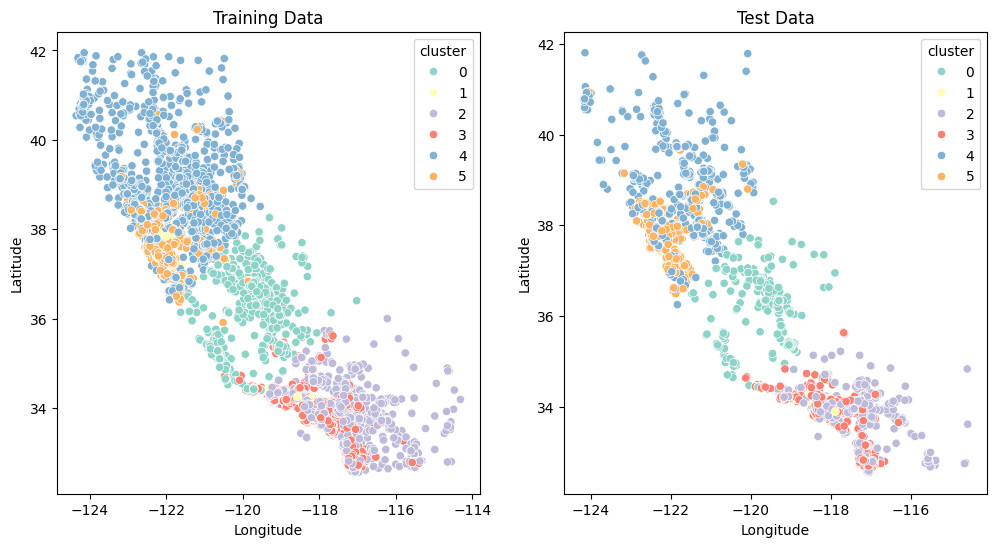

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First subplot for X_train
sns.scatterplot(data=X_train, x="Longitude", y="Latitude", hue="cluster", palette="Set3", ax=ax[0])
ax[0].set_title('Training Data')

# Second subplot for X_test
sns.scatterplot(data=X_test, x="Longitude", y="Latitude", hue="cluster", palette="Set3", ax=ax[1])
ax[1].set_title('Test Data')
plt.show()

👉 Therefore KNN clasiffer seems a good choice for coordination calculations

👨‍💼Preparing the dataset for training

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train['cluster'] = model.labels_ 
y_train = model.labels_

In [13]:
# Make sure X_train does not include the 'cluster' column for KNN model training
y_train = model.labels_
X_train_knn = X_train.drop('cluster', axis=1)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors if necessary
knn.fit(X_train_knn, y_train)

KNeighborsClassifier(n_neighbors=3)

💾Save knn model

In [14]:
from pickle import dump
dump (model, open (f"/workspace/Unsupervised-Learning-K-means/models/knn_model_3n.pk", "wb"))

📊Confusion Matrix and classification report

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the training set
y_pred = knn.predict(X_train_knn)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_train, y_pred)

# Generate the classification report
classification_rep = classification_report(y_train, y_pred)

print("Confusion Matrix:")
print(confusion_mat)

print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1339    0    2    2    5    0]
 [   0  341    0    0    0    1]
 [   1    0 5621    6    0    0]
 [   1    2   12 3009    0    0]
 [   1    0    0    0 3906   12]
 [   1    0    0    0    6 2244]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1348
           1       0.99      1.00      1.00       342
           2       1.00      1.00      1.00      5628
           3       1.00      1.00      1.00      3024
           4       1.00      1.00      1.00      3919
           5       0.99      1.00      1.00      2251

    accuracy                           1.00     16512
   macro avg       1.00      1.00      1.00     16512
weighted avg       1.00      1.00      1.00     16512



🙋‍♂️ Conclusions

✅ Precision: The model achieved high precision for all classes, indicating that it correctly identified most positive samples for each class.

✅ Recall (Sensitivity): The model achieved high recall for all classes, indicating that it correctly identified a large proportion of positive samples for each class.

✅ F1-Score: The F1-Score, which balances precision and recall, is high for all classes, suggesting a well-rounded model performance.

✅ Support: This represents the number of true samples for each class in the dataset.

✅ Accuracy: The model achieved 100% accuracy overall, meaning that all samples were correctly classified in the test dataset.

In summary, the model demonstrates exceptional performance with high precision, recall, and F1-Score for all classes. It achieves perfect accuracy on the test dataset, indicating its effectiveness in classifying the data.

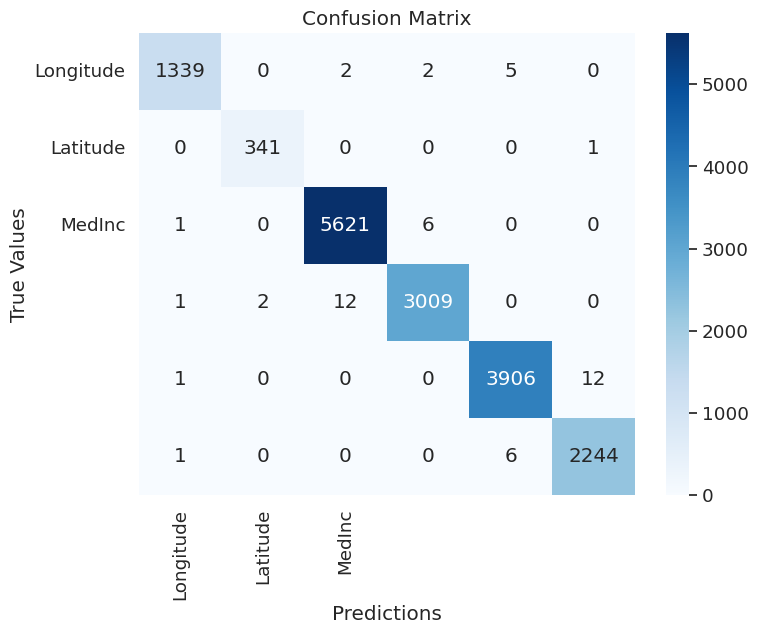

In [19]:
from sklearn.metrics import confusion_matrix

# Define class labels
labels = ['Longitude', 'Latitude', 'MedInc']  # Corrected labels

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_train, y_pred)

# Create a figure and axes for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better visualization
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

🧐Cross Check for KNN

In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Make sure X_train does not include the 'cluster' column
X_train_knn = X_train.drop('cluster', axis=1)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Perform cross-validation
# For example, using 5-fold cross-validation
scores = cross_val_score(knn, X_train_knn, y_train, cv=5)

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))

Accuracy scores for each fold:  [0.99212837 0.99061459 0.9909146  0.9903089  0.99212598]
Mean cross-validation score:  0.991218489221021
Standard deviation of the scores:  0.0007662654856682039


🧙‍♂️ Conclusions:

✅ Data Overview:

The dataset consists of 20,640 entries and 9 columns.
Columns include features such as 'MedInc,' 'HouseAge,' 'AveRooms,' 'AveBedrms,' 'Population,' 'AveOccup,' 'Latitude,' 'Longitude,' and the target variable 'MedHouseVal.'
All columns have non-null values, and they are of float64 data type.

✅ K-Means Clustering:

The K-Means clustering algorithm was applied to the dataset with 6 clusters.
The results include latitude, longitude, 'MedInc,' and the cluster label for some sample data points.

✅ K-Nearest Neighbors (KNN) Classification:

The KNN classifier was used with k=3 neighbors.
The confusion matrix shows the model's performance, with high diagonal values indicating correct predictions and low off-diagonal values suggesting errors.
The classification report provides metrics such as precision, recall, and F1-score for each class, as well as the overall accuracy.
The model achieves high accuracy, precision, recall, and F1-score for all classes, indicating excellent performance.

✅ Cross-Validation:

Cross-validation was performed with 5 folds, resulting in accuracy scores for each fold.
The mean cross-validation score is approximately 99.12%, indicating the model's consistent performance.
The standard deviation of the scores is low, suggesting that the model's performance is stable across folds.
In summary, the K-Means clustering was used to group data points into clusters, and the KNN classifier achieved excellent performance in classifying the data points into classes. The model demonstrated high accuracy and consistency across cross-validation folds.